# Section 3.4: choosing a best model

Is there any one way to choose the best model for a set of data? It depends on several factors and needs to be examined systematically. One of the best ways to do this is to show some goodness-of-fit indicator like the sum of least squares $S$ or the value of the largest absolute error $r$, but to show these in conjunction with graphs and interpretations of the absolute and percent error across the whole domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_fitting_functions import chebyshev_linprog_fit_linear

## Table 3.4 recreation

In Table 3.4 a dataset

| x  | y |
|---|---|
| 0.5|0.7|
|1.0|3.4|
|1.5|7.2|
|2.0|12.4|
|2.5|20.1|


is given, and we are going to use the quadratic model

$$ y = A x^2 $$

to fit the data.

Throughout the past couple of sections of Chapter 3, they have used several methods to determine $A$.

## Method 1: Least-squares criterion

The normal equation for $A$ when we don't linearize the model is

$$ A = \cfrac{\sum y_i x_i^2}{\sum x_i^{4}} $$


## Method 2: Least-squares on linearized data

If we linearize the model, we get

$$ \ln y = \ln A + 2 \ln x $$

Let $A^* = \ln A$, $x^* = \ln x$, and $y^* = \ln y$. Then we have

$$ y^* = 2 x^* + A^* $$

The resulting normal equation is

$$ A = \exp\left[ \frac{\sum_{i=1}^m y^*_i - 2 \sum_{i=1}^m x^*_i}{m} \right] $$

## Method 3: Chebyshev's criterion

This is something we would have to do numerically, but the idea is to construct a model and minimize the **largest absolute error**

$$ r_i = |y_i - A x_i^2| $$

Let $r$ be the error in all the $r_i$'s which is the largest. This results in a system of 10 inequalities

$$ r - 0.7 + 0.25 A \geq 0 $$
$$ r + 0.7 - 0.25 A \geq 0 $$
$$ r - 3.4 + A \geq 0 $$
$$ r + 3.4 - A \geq 0 $$
$$ r - 7.2 + 2.25 A \geq 0 $$
$$ r + 7.2 - 2.25 A \geq 0 $$
$$ r + 12.4 - 4 A \geq 0 $$
$$ r - 12.4 + 4 A \geq 0 $$
$$ r + 20.1 - 6.25 A \geq 0 $$
$$ r - 20.1 + 6.25 A \geq 0 $$

We can use our `linear_fitting_functions` function `chebyshev_linprog_fit_linear` function to find the optimal solution. I.e., what value of $A$ minimizes $r$ and satisfies all the inequalities.

Set up the data as arrays to work with in the notebook

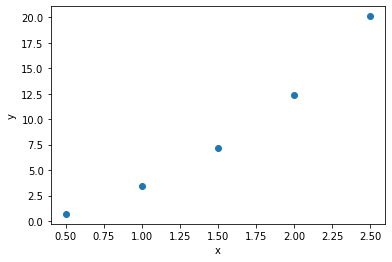

In [5]:
xvals = np.array([0.5,1.0,1.5,2.0,2.5])
yvals = np.array([0.7,3.4,7.2,12.4,20.1])
ndata = len(xvals)

plt.plot(xvals, yvals, 'o');
plt.xlabel('x');
plt.ylabel('y');

# Getting A with method 1

In [6]:
sum_y_i_x_i_2 = 0.0
for i in range(0,ndata):
    sum_y_i_x_i_2 += xvals[i]**2.0 * yvals[i]
    
sum_x_i_4 = 0.0
for i in range(0,ndata):
    sum_x_i_4 += xvals[i]**4.0

In [7]:
A1 = sum_y_i_x_i_2/sum_x_i_4
print('Using method 1, the value of A is', '{:10.4f}'.format(A1))

Using method 1, the value of A is     3.1869


This is exactly the value they report in the book.

# Getting A with method 2

What about if we use the linearized model? Then we need to compute the transformed data

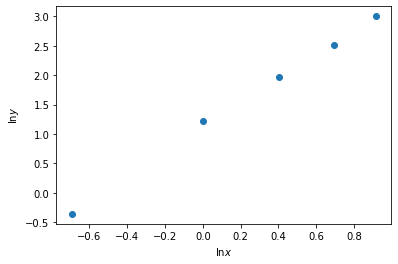

In [8]:
xstarvals = np.log(xvals)
ystarvals = np.log(yvals)

plt.plot(xstarvals, ystarvals, 'o');
plt.xlabel('$\ln x$');
plt.ylabel('$\ln y$');

Using the transformed model, we get

In [10]:
sum_y_i_star = np.sum(ystarvals)
sum_x_i_star = np.sum(xstarvals)

A2star = (sum_y_i_star - 2.0*sum_x_i_star)/ndata
A2 = np.exp(A2star)

print('Using method 2, the value of A is', '{:10.4f}'.format(A2))

Using method 2, the value of A is     3.1368


Again, this is exactly what they report in the book example.

# Getting A with method 3

Finally, let's use the linear program to implement Chebyshev's criterion. If we pass in the array of $x^2$ values and set the y intercept to zero, this is exactly the linear program we want even though it's not a straight line model.

In [14]:
x2vals = np.power(xvals,2.0)
A3_guess = 3.1
b3_fixed = 0.0 # this model has no y intercept, so set it to zero and keep it fixed there 
x2predvals = np.linspace(0.5**2.0, 2.5**2.0, num=10)

Performing linear program optimization with bounds:
       r =          0      29.10
       m =       2.08       4.12
       b =      -0.00       0.00
After 14 iterations...
The optimization was successful! Here are the values it found:
       r =     0.2829
       m =     3.1707
       b =    -0.0000
Check: Largest absolute error is r = 0.28 
 It occurs when x =  4.0000


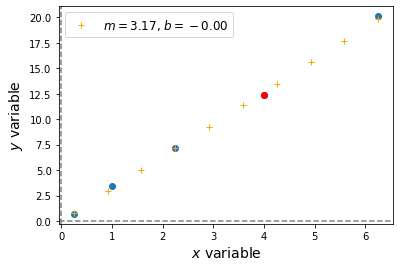

In [16]:
chebyshev_linprog_fit_linear(x2vals, yvals, x2predvals, A3_guess, b3_fixed)

In [17]:
# set A3 from result above
A3 = 3.17073

$A=3.1707$ is exactly what they report in the book to three decimal places! They actually use it to more precision $A = 3.17073$.

# Comparing the three models

1. Direct least-squares gives $A=3.1869$ so that the model is $$ y = 3.1869 x^2 $$
2. Least-squares on the linearized model gives $A=3.1368$ so that the model is $$ y = 3.1368 x^2 $$
3. Chebyshev's criterion gives $A=3.17073$ so that the model is $$ y = 3.17073 x^2 $$

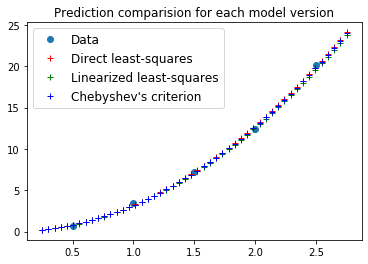

In [28]:
npred = 50
xpred = np.linspace(0.25, 2.75, num=npred)
ypred1 = np.empty(npred)
ypred2 = np.empty(npred)
ypred3 = np.empty(npred)

for i in range(0,npred):
    ypred1[i] = A1*xpred[i]**2.0
    ypred2[i] = A2*xpred[i]**2.0    
    ypred3[i] = A3*xpred[i]**2.0  
    
plt.plot(xvals, yvals, 'o', label='Data')
plt.plot(xpred, ypred1, '+', color='red', label='Direct least-squares');
plt.plot(xpred, ypred2, '+', color='green', label='Linearized least-squares');
plt.plot(xpred, ypred3, '+', color='blue', label='Chebyshev\'s criterion');
plt.title('Prediction comparision for each model version');
plt.legend(fontsize=12);

They all look pretty much the same, honestly...

## First comparison: table 3.5

The first thing they do is compute the errors (difference between $y_i$ and $A x_i^2$) for each data point. It's more instructive to graph these, so let's do that. You can also view them in their table.

In [26]:
err_model_1 = np.empty(ndata)
err_model_2 = np.empty(ndata)
err_model_3 = np.empty(ndata)

for i in range(0,ndata):
    err_model_1[i] = yvals[i] - A1*xvals[i]**2.0
    err_model_2[i] = yvals[i] - A2*xvals[i]**2.0    
    err_model_3[i] = yvals[i] - A3*xvals[i]**2.0    

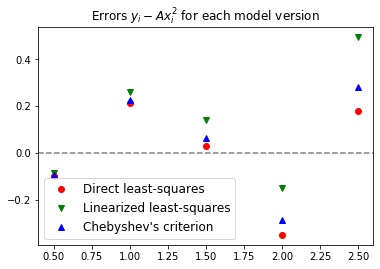

In [27]:
plt.plot(xvals, err_model_1, 'o', color='red', label='Direct least-squares');
plt.plot(xvals, err_model_2, 'v', color='green', label='Linearized least-squares');
plt.plot(xvals, err_model_3, '^', color='blue', label='Chebyshev\'s criterion');
plt.title('Errors $y_i - A x_i^2$ for each model version');
plt.legend(fontsize=12);
plt.axhline(0, linestyle='--', color='gray');

## Second comparison: Table 3.6

The last comparison they perform is computing different measures of goodness of fit for the three models. The two things they compute are

1. The sum of squared errors
2. The size of the maximum absolute error

So let's go ahead and do that.

In [37]:
sum_sq_err1 = 0.0
sum_sq_err2 = 0.0 
sum_sq_err3 = 0.0
for i in range(0,ndata):
    sum_sq_err1 += (yvals[i] - A1*xvals[i]**2.0)**2.0
    sum_sq_err2 += (yvals[i] - A2*xvals[i]**2.0)**2.0    
    sum_sq_err3 += (yvals[i] - A3*xvals[i]**2.0)**2.0    

In [38]:
max_err1 = np.max( np.abs(err_model_1))
max_err2 = np.max( np.abs(err_model_2))
max_err3 = np.max( np.abs(err_model_3))

In [43]:
print('> For direct least-squares:')
print('{: >15}'.format('S '), '=', '{:10.4f}'.format(sum_sq_err1))
print('{: >15}'.format('max abs err'), '=', '{:10.4f}'.format(max_err1))
print() # empty line for spacing

print('> For linearized least-squares:')
print('{: >15}'.format('S '), '=', '{:10.4f}'.format(sum_sq_err2))
print('{: >15}'.format('max abs err'), '=', '{:10.4f}'.format(max_err2))
print()

print('> For Chebyshev criterion:')
print('{: >15}'.format('S '), '=', '{:10.4f}'.format(sum_sq_err3))
print('{: >15}'.format('max abs err'), '=', '{:10.4f}'.format(max_err3))

> For direct least-squares:
             S  =     0.2095
    max abs err =     0.3477

> For linearized least-squares:
             S  =     0.3630
    max abs err =     0.4947

> For Chebyshev criterion:
             S  =     0.2256
    max abs err =     0.2829


So which is better? It all depends on what you want. Model 1 has the smallest $S$, but Model 3 also has a fairly small $S$ value. If the value of the maximum absolute error is what we want, then Model 3 obviously wins. By either criterion, Model 2 loses both measures of fit.